<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis

--- 
# Part 3: Data Analysis and Visualization

## Notebook Summary

This notebook imports the cleaned up datasets and then does some exploratory data analysis to look for trends in testing scores and the types of students who are taking the SAT and possibly underpeforming. The notebook then visualizes some of the most important trends to show the reader what the ideal student profile might look like for marketing SAT test preparation materials and courses. Included in this notebook, the reader will find:

* Exploratory data analysis of all three datasets.
* Data visuals of some of the most relevant trends.
* Final conclusion of findings from the data and policy recommendations to the executive board.

---

### Contents:
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusion and Recommendations](#Conclusion-and-Recommendations)

---

## Exploratory Data Analysis

The reader will find a step by step guide provided by GA below. I have completed steps 1 and 2 in the GA instructions below. However, the reader will find that I have investigated my own sorting and masking questions relevant to my problem statement. As necessary, I note the trend that I am investigating or the question that I am trying to answer in my data analysis prior to a block of code and then indicate any preliminary findings after a block of code.

Complete the following steps to explore your data. You are welcome to do more EDA than the steps outlined here as you feel necessary:
1. Summary Statistics.
2. Use a **dictionary comprehension** to apply the standard deviation function you create in part 1 to each numeric column in the dataframe.  **No loops**.
    - Assign the output to variable `sd` as a dictionary where: 
        - Each column name is now a key 
        - That standard deviation of the column is the value 
        - *Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`
3. Investigate trends in the data.
    - Using sorting and/or masking (along with the `.head()` method to avoid printing our entire dataframe), consider questions relevant to your problem statement. Some examples are provided below (but feel free to change these questions for your specific problem):
        - Which states have the highest and lowest participation rates for the 2017, 2019, or 2019 SAT and ACT?
        - Which states have the highest and lowest mean total/composite scores for the 2017, 2019, or 2019 SAT and ACT?
        - Do any states with 100% participation on a given test have a rate change year-to-year?
        - Do any states show have >50% participation on *both* tests each year?
        - Which colleges have the highest median SAT and ACT scores for admittance?
        - Which California school districts have the highest and lowest mean test scores?
    - **You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

First, I will import the cleaned datasets and then import the requisite Python libraries for analysis and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sat_2019 = pd.read_csv('../data/updated_sat_2019.csv')
sat_by_college = pd.read_csv('../data/sat_by_college.csv')
sat_by_major = pd.read_csv('../data/sat_by_major.csv')

First, since I saved my updated files as a new csv file, there is a high chance that my index column was saved as "Unnamed: 0," and a new index was generated. I will check first the describe method and then write a function to drop this column.

In [3]:
sat_2019.describe()

,Unnamed: 0,participation_rate,reading_writing_score,math_score,total_score
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,25.333333,0.490588,560.803922,552.196078,1113.078431
std,15.342316,0.387476,46.248035,51.290553,97.197910
min,0.000000,0.020000,483.000000,460.000000,943.000000
25%,12.500000,0.055000,527.500000,511.500000,1038.000000
50%,25.000000,0.540000,550.000000,546.000000,1097.000000
75%,37.500000,0.820000,612.000000,599.000000,1210.000000
max,52.000000,1.000000,636.000000,648.000000,1284.000000


In [4]:
def col_drop(df):
    for col in df:
        if col == 'Unnamed: 0':
            return df.drop(columns = 'Unnamed: 0', inplace = True)

In [5]:
col_drop(sat_2019)

sat_2019.describe()

,participation_rate,reading_writing_score,math_score,total_score
count,51.000000,51.000000,51.000000,51.000000
mean,0.490588,560.803922,552.196078,1113.078431
std,0.387476,46.248035,51.290553,97.197910
min,0.020000,483.000000,460.000000,943.000000
25%,0.055000,527.500000,511.500000,1038.000000
50%,0.540000,550.000000,546.000000,1097.000000
75%,0.820000,612.000000,599.000000,1210.000000
max,1.000000,636.000000,648.000000,1284.000000


In [6]:
col_drop(sat_by_college)

sat_by_college.describe()

,number_of_applicants,accept_rate,sat_twenty_fifth_percentile,sat_seventy_fifth_percentile
count,385.000000,385.000000,385.000000,385.000000
mean,17749.589610,0.554291,1170.079221,1361.942857
std,17662.521698,0.239057,128.990934,110.443174
min,464.000000,0.043000,890.000000,1080.000000
25%,5597.000000,0.377000,1070.000000,1270.000000
50%,11798.000000,0.612000,1150.000000,1350.000000
75%,24179.000000,0.738000,1255.000000,1450.000000
max,111322.000000,0.973000,1530.000000,1580.000000


In [7]:
col_drop(sat_by_major)

sat_by_major.describe()

,number_of_testers,percent_by_intended_major,total_score,reading_writing_score,math_score
count,38.000000,38.000000,38.000000,38.000000,38.000000
mean,48394.500000,0.025789,1058.500000,535.500000,523.000000
std,72753.092558,0.039975,82.445969,41.362439,43.386385
min,283.000000,0.000000,916.000000,458.000000,456.000000
25%,6611.000000,0.000000,988.250000,501.250000,486.500000
50%,16370.500000,0.010000,1066.500000,537.000000,527.000000
75%,60215.750000,0.035000,1115.500000,569.750000,542.250000
max,331026.000000,0.180000,1242.000000,597.000000,646.000000


In [8]:
# Redefining the standard deviation function written in Part 1 Coding Challenge

def stan_dev(col):
    return (sum((col - (sum(col)/len(col)))**2) / (len(col) - 1))**0.5

stan_dev(sat_2019['math_score']) # test case against .describe() statistics


51.29055258343124

In [9]:
sd_sat_2019 = {col: stan_dev(sat_2019[col]) for col in sat_2019.columns if sat_2019[col].dtype != 'object'}

sd_sat_2019

{'participation_rate': 0.38747599546142664,
 'reading_writing_score': 46.24803546437109,
 'math_score': 51.29055258343124,
 'total_score': 97.1979100880785}

In [10]:
sd_sat_by_college = {col: stan_dev(sat_by_college[col]) for col in sat_by_college.columns if sat_by_college[col].dtype != 'object'}

sd_sat_by_college

{'number_of_applicants': 17662.52169784868,
 'accept_rate': 0.23905723805854923,
 'sat_twenty_fifth_percentile': 128.9909338885214,
 'sat_seventy_fifth_percentile': 110.44317381738514}

In [11]:
sd_sat_by_major = {col: stan_dev(sat_by_major[col]) for col in sat_by_major.columns if sat_by_major[col].dtype != 'object'}

sd_sat_by_major

{'number_of_testers': 72753.09255756203,
 'percent_by_intended_major': 0.039975098934844945,
 'total_score': 82.4459692030959,
 'reading_writing_score': 41.36243889510568,
 'math_score': 43.386384712008194}

---

### Updated 2019 SAT Dataset Analysis

For my initial analysis of the 2019 SAT data by state, I wanted to know first:

* Which states have a relatively high exam participation rate but still have opportunity for growth in market share?

The rationale behind choosing a higher participation rate is because states with very low participation rates may prove extremely difficult to get new testers to opt in or market share may already be oversaturated by one of our competitors, such as the ACT.

Referring back to my summary statistics, of the 50 states, the 50th to 75th percentile in participation rates is between 54% and 82%. These states are shown below.

In [22]:
sat_2019[(sat_2019['participation_rate'] >= 0.54) & (sat_2019['participation_rate'] < 0.82)] \
.sort_values(by = 'participation_rate', ascending = False)

,Unnamed: 0,state,participation_rate,reading_writing_score,math_score,total_score
21,21,Massachusetts,0.81,559,561,1120
32,32,New York,0.79,531,533,1064
10,10,Georgia,0.71,538,519,1058
38,38,Pennsylvania,0.70,545,537,1082
47,49,Washington,0.70,539,535,1074
40,41,South Carolina,0.68,526,504,1030
43,44,Texas,0.68,515,507,1022
46,48,Virginia,0.68,567,551,1119
14,14,Indiana,0.66,543,537,1080
45,46,Vermont,0.66,560,546,1106


The first thing that I notice is that most states in this range have approximately two-thirds student participation which is ample room for growth in market share. In addition, some of the most populous states are within this band, including California, Texas, New York, Pennsylvania, and Georgia, indicating larger growth potential in market share.

Just to check my assumption about participation rates, I pulled the second quartile of participation rates between 5.5% and 54% to see if a large share of these states had enough SAT testing "momentum" to warrant a serious outreach and marketing strategy.

In [23]:
sat_2019[(sat_2019['participation_rate'] >= 0.055) & (sat_2019['participation_rate'] < 0.54)] \
.sort_values(by = 'participation_rate', ascending = False)

,Unnamed: 0,state,participation_rate,reading_writing_score,math_score,total_score
33,33,North Carolina,0.51,554,546,1100
37,37,Oregon,0.51,562,550,1112
1,1,Alaska,0.41,556,541,1097
2,2,Arizona,0.31,569,565,1134
36,36,Oklahoma,0.22,490,472,963
28,28,Nevada,0.20,580,576,1156
35,35,Ohio,0.19,550,548,1097
31,31,New Mexico,0.18,543,530,1073
26,26,Montana,0.09,603,596,1199
0,0,Alabama,0.07,583,560,1143


As I suspected based on the range of range of the second quartile of participation rates, most of the states here have participation rates of 20% or lower. While it might make sense to target some outreach efforts to these states, for most, there may not be enough buy-in or statewide policy support to get substantial growth in market share.

Next, I wanted to know:

* In which states is there evidence of underachievement in SAT test scores in comparison to the average by state nationwide?

I decided to pull data from the total score within the second quartile of total score, namely from 1038 to 1097. The rationale for pulling data from the second quartile is because these states are currently performing below the median, which makes it easier to persuade schools, policy-makers, and families of the need for enhanced test preparation.

In [12]:
sat_2019[(sat_2019['total_score'] >= 1038) & (sat_2019['total_score'] < 1097)] \
.sort_values(by = 'total_score')

,Unnamed: 0,state,participation_rate,reading_writing_score,math_score,total_score
6,6,Connecticut,1.00,529,516,1046
10,10,Georgia,0.71,538,519,1058
20,20,Maryland,0.82,535,523,1058
29,29,New Hampshire,0.95,533,526,1059
32,32,New York,0.79,531,533,1064
4,4,California,0.63,534,531,1065
31,31,New Mexico,0.18,543,530,1073
47,49,Washington,0.70,539,535,1074
14,14,Indiana,0.66,543,537,1080
38,38,Pennsylvania,0.70,545,537,1082


The most important observation here is that the underperforming states have considerable overlap with those that I found also had substantial room for growth in participation rates. Six states are present on both lists, including California, Georgia, Indiana, New York, Pennsylvania, and Washington. Four of those also top the ten most populous states.

Again, to double-check my assumptions, I chose to examine the list of states performing at the bottom quartile of total SAT scores.

In [104]:
sat_2019[(sat_2019['total_score'] >= 943) & (sat_2019['total_score'] < 1038)] \
.sort_values(by = 'total_score')

,state,participation_rate,reading_and_writing_score,math_score,total_score
50,West Virginia,0.99,483,460,943
36,Oklahoma,0.22,490,472,963
8,District of Columbia,0.94,495,480,975
7,Delaware,1.00,499,486,985
12,Idaho,1.00,505,488,993
40,Rhode Island,1.00,503,492,995
9,Florida,1.00,516,483,999
22,Michigan,1.00,507,496,1003
13,Illinois,1.00,509,504,1013
19,Maine,0.99,512,502,1013


Many of these states already have at or near 100% participation rates, possibly as a result of the state in some cases requiring the SAT as a high school graduation requirement. Therefore, despite low average test scores representing a need for enhanced test preparation, these states already have saturated testing markets.

Next, I will investegate trends in college admissions, paying close attention to SAT scores and acceptance rates at college. I want to know:

* For students who are potentially underperforming on the SAT, to which colleges are they being accepted and in what numbers?

I begin by looking at the 25th percentile range of SAT scores compared against acceptance rates. I run a comparison of 25th percentiles which are ranked in the second quartile and then 25th percentiles which are ranked in the third quartile. The goal here is look towards the students who are faring somewhat in the middle of test scores and get a sense of how competitive are the schools to which they are accepted for being on the lower end of SAT scores.

In [33]:
sat_by_college[(sat_by_college['sat_twenty_fifth_percentile'] >= 1070) & (sat_by_college['sat_twenty_fifth_percentile'] < 1150)] \
.sort_values(by = 'accept_rate').head()

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_middle_fifty_percent,act_total_middle_fifty_percent,sat_twenty_fifth_percentile,sat_seventy_fifth_percentile
85,San Diego State University,Yes (TB),2021,The Cal State system has adopted a one-year te...,69842,0.340,1110-1320,22-29,1110.0,1320.0
93,CUNY--Hunter,Yes (TB),2021,The CUNY system has adopted a one-year Test Bl...,31030,0.364,1090-1260,--,1090.0,1260.0
99,Pratt Institute,Yes,2021,The Pratt Institute has adopted a one-year tes...,7941,0.385,1100-1320,26-30,1100.0,1320.0
114,CUNY--Baruch College,Yes (TB),2021,The CUNY system has adopted a one-year Test Bl...,20303,0.434,1130-1330,--,1130.0,1330.0
115,Spelman College,Yes,2021,Spelman has adopted a one-year test optional p...,9106,0.434,1080-1230,22-26,1080.0,1230.0


In [34]:
sat_by_college[(sat_by_college['sat_twenty_fifth_percentile'] >= 1150) & (sat_by_college['sat_twenty_fifth_percentile'] < 1255)] \
.sort_values(by = 'accept_rate').head()

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_middle_fifty_percent,act_total_middle_fifty_percent,sat_twenty_fifth_percentile,sat_seventy_fifth_percentile
56,Rhode Island School of Design,Yes,All / Permanent Policy,Rhode Island School of Design offers a test op...,3913,0.239,1180-1440,26-32,1180.0,1440.0
60,University of California—​Irvine,Yes (TB),2021 2022 2023 2024,UCI has adopted a four-year test blind policy ...,95568,0.265,1180-1440,--,1180.0,1440.0
65,California State Polytechnic University—​San L...,Yes (TB),2021,The Cal State system has adopted a one-year te...,54072,0.284,1250-1420,26-32,1250.0,1420.0
71,Skidmore College,Yes,All / Permanent Policy,Skidmore College offers a test optional policy...,11102,0.300,1220-1400,28-32,1220.0,1400.0
72,University of California—​San Diego,Yes,2021 2022 2023 2024,The UC system has adopted a two-year test opti...,97901,0.302,1250-1470,26-33,1250.0,1470.0


The first thing that I notice is that for these students accepted at the 25th percentile compared to their peer, the schools represent a relatively similar acceptance rate, appearing between 30%-50%. There are some more exclusive schools topping the list such as Rhode Island School of Design, UC-Irvine, and Cal Poly-SLO, having below 30% acceptance rates. However, by and large, the acceptance rates appear to be in that range of 30%-50%.

Another interesting observation is that many of the schools topping these two lists are public colleges and universities, especially schools which are part of the City University of New York (CUNY) system and both California State University (CSU) and University of California (UC).

Next, I will undergo the same analysis with the 75th percentile of scores, looking at the 1st, 2nd, and 3rd quartile of rankings.

In [35]:
sat_by_college[(sat_by_college['sat_seventy_fifth_percentile'] >= 1080) & (sat_by_college['sat_seventy_fifth_percentile'] < 1270)] \
.sort_values(by = 'accept_rate').head()

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_middle_fifty_percent,act_total_middle_fifty_percent,sat_twenty_fifth_percentile,sat_seventy_fifth_percentile
93,CUNY--Hunter,Yes (TB),2021,The CUNY system has adopted a one-year Test Bl...,31030,0.364,1090-1260,--,1090.0,1260.0
98,Berea College,Yes,2021,Berea College has adopted a one-year test opti...,1576,0.382,1030-1213,22-27,1030.0,1213.0
101,California State University--Los Angeles,Yes (TB),2021,The Cal State system has adopted a one-year te...,39854,0.390,890-1080,15-20,890.0,1080.0
102,California State University--Long Beach,Yes (TB),2021,The Cal State system has adopted a one-year te...,71297,0.393,1040-1250,20-26,1040.0,1250.0
115,Spelman College,Yes,2021,Spelman has adopted a one-year test optional p...,9106,0.434,1080-1230,22-26,1080.0,1230.0


In [36]:
sat_by_college[(sat_by_college['sat_seventy_fifth_percentile'] >= 1270) & (sat_by_college['sat_seventy_fifth_percentile'] < 1350)] \
.sort_values(by = 'accept_rate').head()

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_middle_fifty_percent,act_total_middle_fifty_percent,sat_twenty_fifth_percentile,sat_seventy_fifth_percentile
85,San Diego State University,Yes (TB),2021,The Cal State system has adopted a one-year te...,69842,0.340,1110-1320,22-29,1110.0,1320.0
91,Hampton University,Yes*,All / Permanent Policy,Hampton University requires either the SAT or ...,13028,0.360,1040-1310,19-24,1040.0,1310.0
99,Pratt Institute,Yes,2021,The Pratt Institute has adopted a one-year tes...,7941,0.385,1100-1320,26-30,1100.0,1320.0
114,CUNY--Baruch College,Yes (TB),2021,The CUNY system has adopted a one-year Test Bl...,20303,0.434,1130-1330,--,1130.0,1330.0
129,University of New Mexico,Yes,All / Permanent Policy,UNM offers a test optional policy which allows...,12281,0.486,1040-1270,19-25,1040.0,1270.0


In [37]:
sat_by_college[(sat_by_college['sat_seventy_fifth_percentile'] >= 1350) & (sat_by_college['sat_seventy_fifth_percentile'] < 1450)] \
.sort_values(by = 'accept_rate').head()

,school,test_optional,applies_to_class_years,policy_details,number_of_applicants,accept_rate,sat_total_middle_fifty_percent,act_total_middle_fifty_percent,sat_twenty_fifth_percentile,sat_seventy_fifth_percentile
56,Rhode Island School of Design,Yes,All / Permanent Policy,Rhode Island School of Design offers a test op...,3913,0.239,1180-1440,26-32,1180.0,1440.0
60,University of California—​Irvine,Yes (TB),2021 2022 2023 2024,UCI has adopted a four-year test blind policy ...,95568,0.265,1180-1440,--,1180.0,1440.0
61,University of Miami,Yes,2021,University of Miami has adopted a one-year tes...,38919,0.271,1280-1420,29-32,1280.0,1420.0
65,California State Polytechnic University—​San L...,Yes (TB),2021,The Cal State system has adopted a one-year te...,54072,0.284,1250-1420,26-32,1250.0,1420.0
71,Skidmore College,Yes,All / Permanent Policy,Skidmore College offers a test optional policy...,11102,0.300,1220-1400,28-32,1220.0,1400.0


Once again, although we are looking at the 75th percentile of test scores we see that acceptance rates are not wildly different still faring in the 30%-50% range. You will also notice that many of the schools are repeats the we saw when looking at the 25th percentile, again strong representation from our public colleges and universities with California and New York schools very prevalent.

Lastly, I will analyze test scores in comparison to the intended majors of test takers. I would like to investigate:

* For which intended majors are test takers in the greatest number and show signs of underperforming in comparison to their peers?

Once again, the marketing strategy is meant to show the greatest growth with the potential to encourage more students to enroll in College Board test preparation courses and purchase other materials.

In [39]:
sat_by_major.sort_values(by = 'percent_by_intended_major', ascending = False).head()

,intended_college_major,number_of_testers,percent_by_intended_major,total_score,reading_writing_score,math_score
14,Health Professions and related Clinical Sciences,331026,0.18,1048,529,518
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537
9,Engineering,194127,0.11,1139,559,581
3,Biological and Biomedical Sciences,155834,0.08,1139,572,566
35,"Visual and Performing Arts, General",130642,0.07,1045,536,510


In [42]:
sat_by_major[(sat_by_major['total_score'] >= 1038) & (sat_by_major['total_score'] < 1097)] \
.sort_values(by = 'percent_by_intended_major', ascending = False).head()

,intended_college_major,number_of_testers,percent_by_intended_major,total_score,reading_writing_score,math_score
14,Health Professions and related Clinical Sciences,331026,0.18,1048,529,518
4,"Business, Management, Marketing, and Related S...",221523,0.12,1072,534,537
35,"Visual and Performing Arts, General",130642,0.07,1045,536,510
37,Undecided,126939,0.07,1069,538,532
29,"Psychology, General",75626,0.04,1064,546,518


First, I just looked at the percentage of intended majors out of the total number of test takers. Heathcare, business, and engineering majors topped the chart, all over 10% of the test taking population.

Next, I wanted see how this group of intended majors compared with underperforming states in my very first analysis. I pulled the range of average scores by state in the second quartile between 1038 and 1097. Notice how after filtering for these specific, lower performing scores that healthcare and business potential majors remained at the top of the list while engineering majors disappeared as having generally higher scores on average.

After examining all these trends, I will be using some of these trends to visualize patterns in the data below.

---

## Visualize the Data

For this section, GA has provided recommended prompts below for the kinds of data visuals to create for interpreting these datasets. I will mostly be sticking to these prompts and then curating specific visuals later as needed when making final recommendations.

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers. It is important to not only create visualizations, but to **interpret your visualizations** as well.

**Every plot should**:
- Have a title
- Have axis labels
- Have appropriate tick labels
- Text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Have an interpretation to aid understanding

Here is an example of what your plots should look like following the above guidelines. Note that while the content of this example is unrelated, the principles of visualization hold:

![](https://snag.gy/hCBR1U.jpg)
*Interpretation: The above image shows that as we increase our spending on advertising, our sales numbers also tend to increase. There is a positive correlation between advertising spending and sales.*

---

Here are some prompts to get you started with visualizations. Feel free to add additional visualizations as you see fit:
1. Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features.
    - Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).
    - Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).
2. Visualize distributions using histograms. If you have a lot, consider writing a custom function and use subplots.
    - *OPTIONAL*: Summarize the underlying distributions of your features (in words & statistics)
         - Be thorough in your verbal description of these distributions.
         - Be sure to back up these summaries with statistics.
         - We generally assume that data we sample from a population will be normally distributed. Do we observe this trend? Explain your answers for each distribution and how you think this will affect estimates made from these data.
3. Plot and interpret boxplots. 
    - Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.
    - Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).
    - Each boxplot should:
        - Only include variables of a similar scale
        - Have clear labels for each variable
        - Have appropriate titles and labels
4. Plot and interpret scatter plots to view relationships between features. Feel free to write a custom function, and subplot if you'd like. Functions save both time and space.
    - Your plots should have:
        - Two clearly labeled axes
        - A proper title
        - Colors and symbols that are clear and unmistakable
5. Additional plots of your choosing.
    - Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

First, I will be making heatmaps of the numeric variables in all three analyzed datasets. The heatmaps will inform which correlations might be useful to plot in later data visuals.

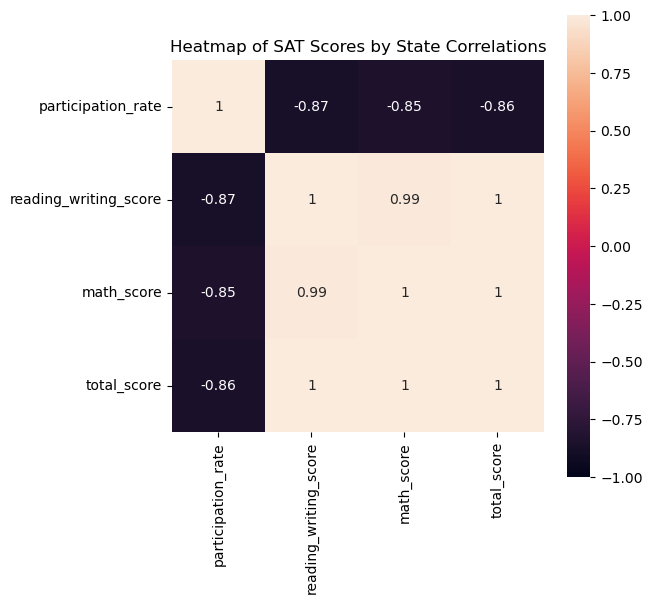

In [12]:
# Code

sat_2019_corr = sat_2019.corr(numeric_only = True)

plt.figure(figsize = (6, 6))
plt.title('Heatmap of SAT Scores by State Correlations')
sns.heatmap(sat_2019_corr,
           annot = True,
           square = True,
           vmin = -1,
           vmax = 1);

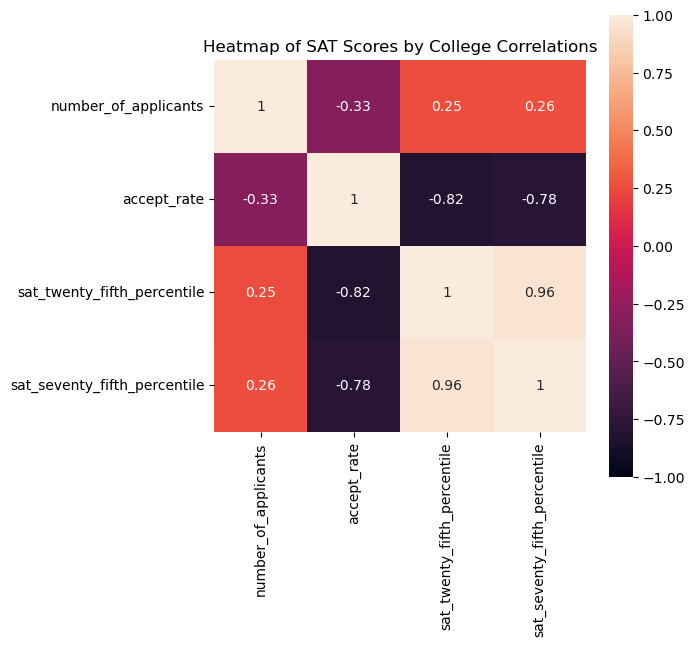

In [15]:
sat_by_college_corr = sat_by_college.corr(numeric_only = True)

plt.figure(figsize = (6, 6))
plt.title('Heatmap of SAT Scores by College Correlations')
sns.heatmap(sat_by_college_corr,
           annot = True,
           square = True,
           vmin = -1,
           vmax = 1);

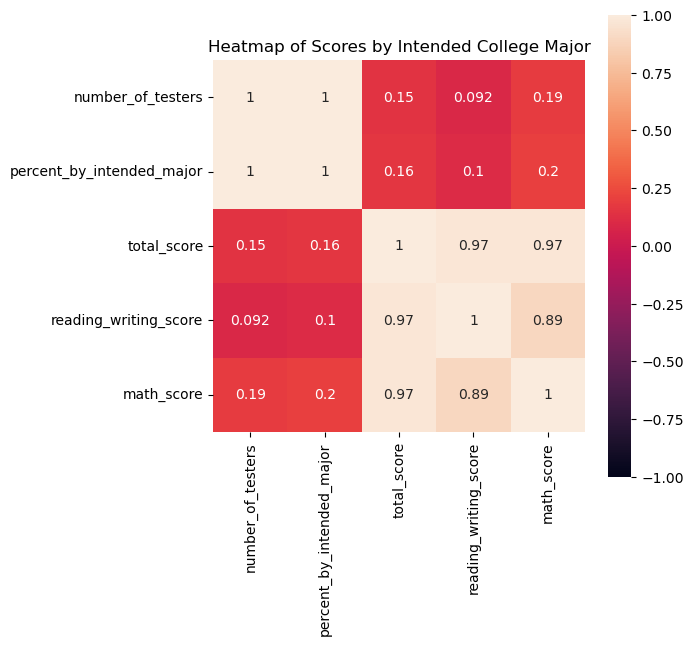

In [16]:
sat_by_major_corr = sat_by_major.corr(numeric_only = True)

plt.figure(figsize = (6, 6))
plt.title('Heatmap of Scores by Intended College Major')
sns.heatmap(sat_by_major_corr,
           annot = True,
           square = True,
           vmin = -1,
           vmax = 1);

Examining these heatmaps, many of the correlations are relatively obvious. In the 2019 SAT scores by state, there are nearly perfect positive correlations between Evidence-Based Reading and Writing scores with Math scores as well total scores with each of the sections of the exam. Another correlation that we saw in the data analysis earlier was the strong negative correlation between scores and participation rates, meaning those states with higher participation rates had lower average scores.

Another seemingly commonsensical correlation is the strong negative correlation between SAT percentile scores and the acceptance rate of a given school. This should make sense since schools with a lower acceptance rather tend to accept students who have higher test scores and that means that the range of scores among accepted student in the 25th to 75th percentile is higher. These correlations might be useful to visualize later in a scatterplot to see the strong negative correlation.

Finally, when looking at intended college majors, there is a somewhat weak positive relationship between test scores and number of testers who intend to enroll in a given major. This means that for majors which have more applicants (such as healthcare related majors), there is a slight correlation with higher test scores on average.

Next, I visualize the distribution of participation in testing by state.

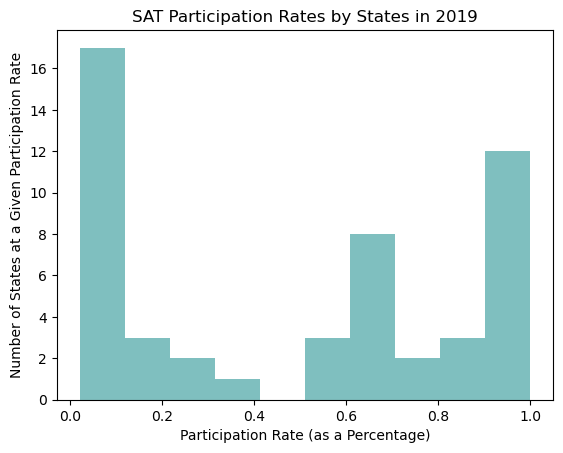

In [109]:
plt.hist(sat_2019['participation_rate'], color = 'teal', alpha = 0.5)
plt.xlabel('Participation Rate (as a Percentage)')
plt.ylabel('Number of States at a Given Participation Rate')
plt.title('SAT Participation Rates by States in 2019')
plt.savefig('../images/participation_by_state.png');

As we saw earlier in the data analysis, there are a large number of states with very low testing rates. On the other hand a large number of state have participation rates in the 50%-70% range, indicating opportunites for growth in market share within those states.

Turning our attention to the ranges of SAT scores of accepted students at nearly 400 schools surveyed, let us look at the spread of the 25th and 75th percentile together in both historgrams and boxplots.

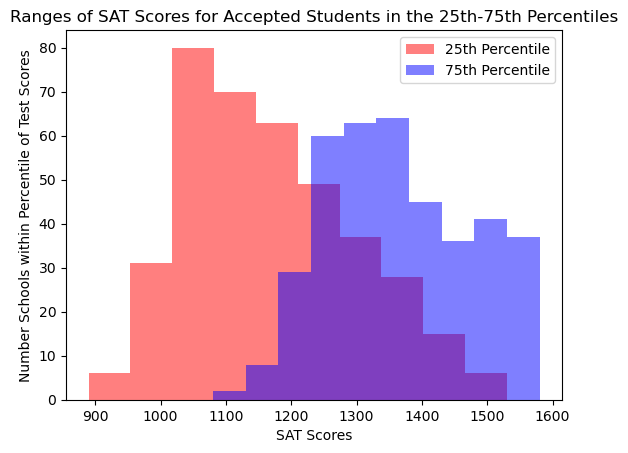

In [17]:
plt.hist(sat_by_college['sat_twenty_fifth_percentile'], color = 'r', alpha = 0.5, label = '25th Percentile')
plt.hist(sat_by_college['sat_seventy_fifth_percentile'], color = 'b', alpha = 0.5, label = '75th Percentile')
plt.legend()
plt.xlabel('SAT Scores')
plt.ylabel('Number Schools within Percentile of Test Scores')
plt.title('Ranges of SAT Scores for Accepted Students in the 25th-75th Percentiles')
plt.savefig('../images/hist_score_ranges');

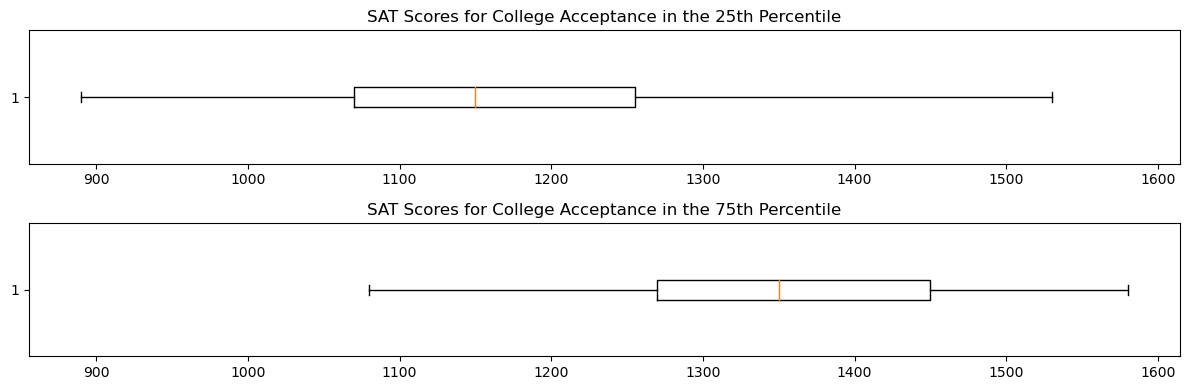

In [18]:
plt.figure(figsize = (12,4))

ax1 = plt.subplot(2, 1, 1)
ax1.set_title('SAT Scores for College Acceptance in the 25th Percentile')
ax1.boxplot(sat_by_college['sat_twenty_fifth_percentile'], vert = False)

ax2 = plt.subplot(2, 1, 2, sharex = ax1)
ax2.set_title('SAT Scores for College Acceptance in the 75th Percentile')
ax2.boxplot(sat_by_college['sat_seventy_fifth_percentile'], vert = False)

plt.tight_layout()
plt.savefig('../images/box_score_ranges.png');

Comparing the histograms and boxplots above, we can see that a large number of schools admit students whose tests are anywhere from about 1050 to 1200 in their 25th percentile of accepted students as well as admitting student from about 1250 to 1400 in their 75th percentile of accepted students. Comparing the two medians, student score on average range from 1150 to 1350. Since the marketing strategy is to seek students who may want additional test preparation and materials, the College Board ought to consider targeting outreach to students just below this range in the range of 1050 to 1200.

Now, let us see how these percentiles of scores for accepted students compares to the acceptance rates at these college surveryed in 2021.

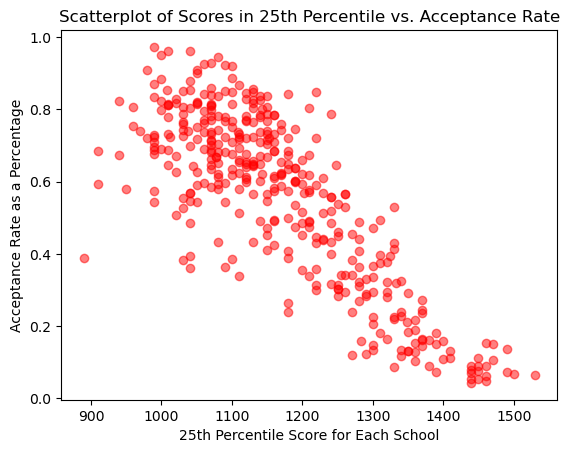

In [115]:
plt.scatter(sat_by_college['sat_twenty_fifth_percentile'], 
            sat_by_college['accept_rate'],
            color = 'r',
            alpha = 0.5)
plt.xlabel('25th Percentile Score for Each School')
plt.ylabel('Acceptance Rate as a Percentage')
plt.title('Scatterplot of Scores in 25th Percentile vs. Acceptance Rate')
plt.savefig('../images/scatter_25th_percentile_schools.png');

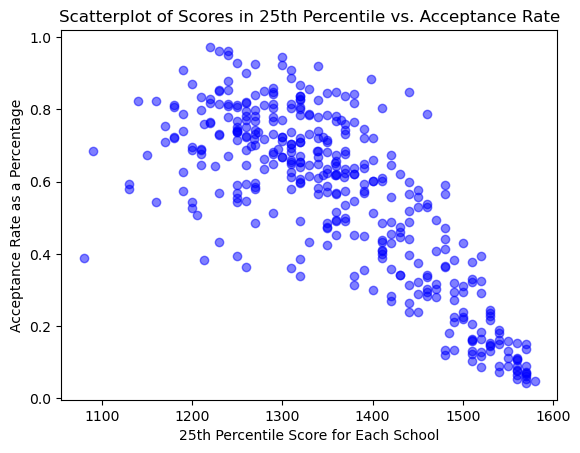

In [96]:
plt.scatter(sat_by_college['sat_seventy_fifth_percentile'], 
            sat_by_college['accept_rate'],
            color = 'b',
            alpha = 0.5)
plt.xlabel('25th Percentile Score for Each School')
plt.ylabel('Acceptance Rate as a Percentage')
plt.title('Scatterplot of Scores in 25th Percentile vs. Acceptance Rate');

As mentioned in the earlier analysis, there is a pretty strong negative correlation, showing the intuitive connection that those school with higher score ranges among their accepted applicants tend to have a lower acceptance rate. According to both scatterplots there is a much higher concentration of schools above the 30% acceptance threshold, so it would make sense to target students who are applying to schools where there is a somewhat competitive acceptance rate but perhaps not considered the most elite or exclusive.

Lastly, let us consider the relationships between intended college majors and test scores.

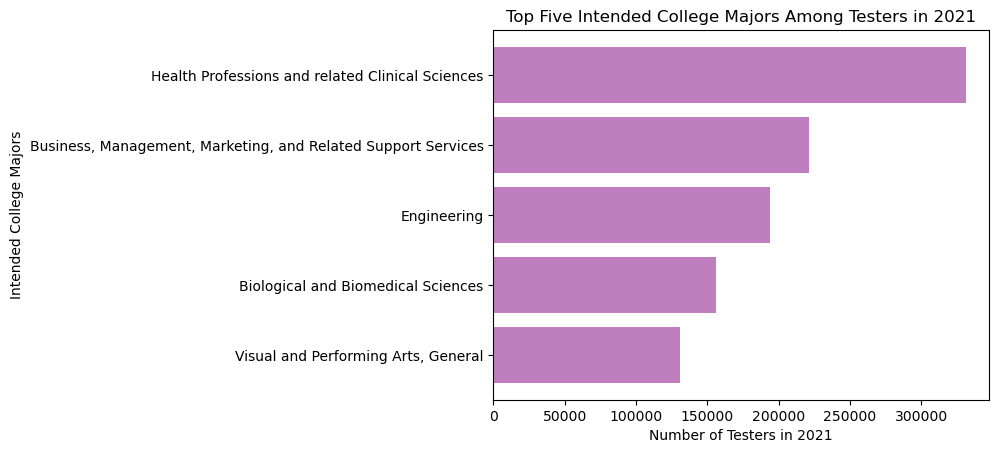

In [116]:
top_majors = sat_by_major.sort_values(by = 'number_of_testers', ascending = False).head(5)

plt.barh(top_majors['intended_college_major'][::-1], top_majors['number_of_testers'][::-1], color = 'purple', alpha = 0.5)
# plt.xticks()
plt.ylabel('Intended College Majors')
plt.xlabel('Number of Testers in 2021')
plt.title('Top Five Intended College Majors Among Testers in 2021')
plt.savefig('../images/top_five_majors.png');

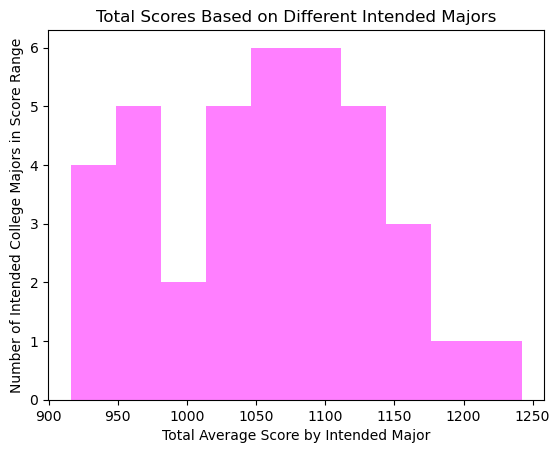

In [117]:
plt.hist(sat_by_major['total_score'], color = 'magenta', alpha = 0.5)
plt.xlabel('Total Average Score by Intended Major')
plt.ylabel('Number of Intended College Majors in Score Range')
plt.title('Total Scores Based on Different Intended Majors')
plt.savefig('../images/hist_majors.png');

First, we see the top five intended majors based on number of test takers. Health professions have a clear lead with over 300,000 testers. Business and engineering prospective majors take a trailing but still staggering (~200,000) number of testers.

Second, we see a similar pattern in test scores to what we have seen in all three data sets. There is a relatively large glut students who are scoring on average between 1000 and 1150, similar to the range that we saw earlier among students accepted who were in the 25th percentile range of colleges.

I will now move on to final conclusions and recommendations.

---

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Make sure to answer your question of interest or address your problem statement here.

The reader will recall that the problem statement at hand was to use recent testing data to create a profile of the "ideal student" to market for the College Board test preparation, materials, and registration in testing. We have considered in this analysis:

* Geographic location by state
* College acceptance rates for schools to which prospective students might apply
* Intended college majors among test takers.

In analyzing the data, certain assumptions were made:

* To bring in new students to SAT testing, we should identify potential growth markets.
* Students who are performing on the SAT slightly below the median of their peers may have the greatest potential to wish to enhance their tests scores.

I will now summarize the key findings and attached policy recommendation to the College Board:

---

**Finding 1:** There is substantial overlap between states which have middle participation rate (~50%-80%) and those states whose students are performing somwhat below the median (1097) in comparison to other states (25th-50th percentile).

**Recommendation 1:** The College Board should concentrate its marketing efforts in those states in which market share is moderate but not yet saturated and create a marketing strategy for policy-makers and school districts which focuses on improving student testing outcomes with increased investment in test preparation. The states which show the most promise here are California, Georgia, New York Pennsylvania, and Washington.

---

**Finding 2:** A large number of colleges and universities accept students whose SAT scores are approximately 1050 to 1200 as the 25th percentile of all accepted applicants' test scores. Students in this band of scores appear to be applying to schools which have on average between a 30%-50% acceptance rate. Many of the schools in this range of acceptance rates include public univiersities and colleges.

**Recommendation 2:** The College Board should focus its marketing campaign on student who are peforming somewhat below the median of their peers and who are applying to "second-tier" schools. This should include marketing strategy targeted at schools and districts to create intervention programs for students who may be close to on-track for application and admissions at public universitites. Specific partnerships could be developed with public university systems like CUNY, CSU, and UC systems to encourage test preparation for high school students.

---

**Finding 3:** Healthcare, business, and engineering intended majors represent over 750,000 test takers or over 40% of total testers in 2021. Of these three intended majors, healthcare and business majors underperform on average in comparison to the median (1097) for their peers with average scores of 1048 and 1072, respectively.

**Recommendation 3:** The College Board should market to counselors in schools and districts to create school-based test preparation programs for students intending to enroll in healthcare or business majors. The College Board should use data from student PSAT test scores and intended college majors to make targeted marketing efforts to families and students who are intending to enroll as healthcare or business majors.